In [1]:
from basic_tools import *
from config import DockerConfig
from media import Media
from openai_api import GPTApi, WisperApi
from subtitle import SubtitleWriter, SubtitleDecoder
from media import Media

cfg = DockerConfig()
gpt = GPTApi(cfg("OPENAI_API_KEY_PETER"))
wis = WisperApi(cfg("OPENAI_API_KEY_PETER"))



读取本地配置文件: config.ini


In [2]:
md = Media(FilePath(r"E:\电影\奥本海默 (1).mp4"),
           SystemCmd())

In [3]:
res = md.get_audio_pice(300)

ffmpeg -i "E:\电影\奥本海默 (1).mp4" -ss 0 -t 300 -aq 0 -map a "E:\电影\temp.mp3"


In [4]:
audio_file = open(r"E:\电影\temp.mp3", "rb")
transcript = wis.transcribe_timestamp(audio_file)

In [5]:
print(transcript)

Transcription(text="♪♪ ♪♪ ♪♪ ♪♪ ♪♪ ♪♪ ♪♪ Dr. Oppenheimer. Dr. Oppenheimer. As we begin, I believe you have a statement to read into the record.  We're not judges, doctor. No. Of course. ♪♪ Members of the Security Board, the so-called derogatory information in your indictment of me cannot be fairly understood except in the context of my life and my work. How long did he testify? Honestly, I forget. The whole hearing took a month. An ordeal. Well, I've only read the transcripts. Who'd want to justify their whole life? You weren't there? As chairman, I wasn't allowed to be. Are they really going to ask about it? It was years ago. Four years ago. Five. Oppenheimer still divides America. The committee's gonna want to know where you stood. Senator Thurmond asked me to say not to feel that you're on trial. Oh, it's funny. I didn't know you just said that. Really, Mr. Strauss... It's Admiral. Yeah. Admiral Strauss, this is a formality. President Eisenhower's asked you to be in his cabinet. The

In [6]:
words = transcript.words
print(words)

[{'word': '♪♪', 'start': 0.0, 'end': 11.15999984741211}, {'word': '♪♪', 'start': 11.15999984741211, 'end': 19.739999771118164}, {'word': '♪♪', 'start': 19.739999771118164, 'end': 26.860000610351562}, {'word': '♪♪', 'start': 26.860000610351562, 'end': 39.2400016784668}, {'word': '♪♪', 'start': 39.2400016784668, 'end': 69.22000122070312}, {'word': '♪♪', 'start': 69.22000122070312, 'end': 69.22000122070312}, {'word': '♪♪', 'start': 77.87999725341797, 'end': 78.55999755859375}, {'word': 'Dr', 'start': 78.55999755859375, 'end': 79.0}, {'word': 'Oppenheimer', 'start': 79.19999694824219, 'end': 79.44000244140625}, {'word': 'Dr', 'start': 81.68000030517578, 'end': 82.0}, {'word': 'Oppenheimer', 'start': 82.16000366210938, 'end': 82.4000015258789}, {'word': 'As', 'start': 83.0, 'end': 84.58000183105469}, {'word': 'we', 'start': 84.58000183105469, 'end': 85.23999786376953}, {'word': 'begin', 'start': 85.23999786376953, 'end': 85.23999786376953}, {'word': 'I', 'start': 85.30000305175781, 'end': 8

In [7]:
sentence = ""
for word in words:
    print(word["word"], end=" ")
    sentence += word["word"] + " "
sentence = sentence[:-1]


♪♪ ♪♪ ♪♪ ♪♪ ♪♪ ♪♪ ♪♪ Dr Oppenheimer Dr Oppenheimer As we begin I believe you have a statement to read into the record Yes your honor We're not judges No Of course ♪♪ Members of the Security Board the so called derogatory information in your indictment of me cannot be fairly understood except in the context of my life and my work How long did he testify Honestly I forget The whole hearing took a month An ordeal Well I've only read the transcripts Who'd want to justify their whole life You weren't there As chairman I wasn't allowed to be Are they really going to ask about it It was years ago Four years ago Five Oppenheimer still divides America The committee's gonna want to know where you stood Senator Thurmond asked me to say not to feel that you're on trial Oh it's funny I didn't know you just said that Really Mr Strauss It's Admiral Yeah Admiral Strauss this is a formality President Eisenhower's asked you to be in his cabinet The Senate really has no choice but to confirm you And if t

In [8]:
prompt = """
You are a subtitle segmenter. Your task is to segment the text enclosed in <<<>>> symbols into short sections based on semantics and pauses, with each section not exceeding 12 words and containing no punctuation. Each segmented subtitle should be presented in the following format:
-
subtitle text 1
-
subtitle text 2
-
Maintain the natural flow of the dialogue and ensure each segment can independently convey a complete meaning. Do not provide any explanations with your outputs. Do not modify any text.

"""

In [57]:
prompt2 = """
你是一个字幕匹配器，你的任务是将<<<>>>中包裹的文本，与((()))中包裹的文本进行匹配，确保两者之间的内容相互对应。
<<<>>>中包裹的文本是原始文本，((()))中包裹的文本是翻译文本。
翻译文本中有符号"|"进行分段，请你将翻译文本中的每一个分段都匹配到原始文本中的一个分段。
确保不要修改任何文本，原始文本和翻译文本都不允许修改。不要遗漏任何一个字符。不虚要保证原始文本的流畅性。
每一个分段应该按照以下格式呈现：
---
翻译文本 1
-
原始文本 1
---
翻译文本 2
-
原始文本 2
---
翻译文本 3
-
原始文本 3
---
请不要提供任何解释，不要回答任何问题。
"""

In [58]:
prompt3 = """
你是一个字幕翻译器，你的任务是翻译被<<<>>>包裹的文本到中文，用流利自然以及地道的中文翻译。使用符号"|"进行断句，不允许使用任何其他标点符号。每一个分段不超过15个字。
你可以自由的修改调整中文，加入适当的语言表达，以使翻译更加地道，本土化，尽力表达原文的意思。
按照以下格式呈现：
---
中文文本1|中文文本2|中文文本3
---
"""

In [59]:
msg = '面部操去看看那个视频|视频里展示了很多内容|首先教你的是用多少肌肉力量来做练习|当我做练习时|你可以看到我只是抬起额头|你可以看到我只是抬起脸颊|你可以看到我只是这样做|当我做这些动作时|我在挤压肌肉|我不是这样做的|我不是这样做的|我不是这样做的|我知道我的脸已经扭曲了|但我确实认识这样做的人|这不是做面部操的方法|正确的面部操方法在这个视频里'
usermsg = "<<<{}>>>\n((({})))".format(sentence,msg)

In [37]:
usermsg = "<<<{}>>>".format(sentence)

In [60]:
# openAI message format
message = [
    {"role": "system", "content": prompt2},
    {"role": "user", "content": usermsg}
]
message

[{'role': 'system',
  'content': '\n你是一个字幕匹配器，你的任务是将<<<>>>中包裹的文本，与((()))中包裹的文本进行匹配，确保两者之间的内容相互对应。\n<<<>>>中包裹的文本是原始文本，((()))中包裹的文本是翻译文本。\n翻译文本中有符号"|"进行分段，请你将翻译文本中的每一个分段都匹配到原始文本中的一个分段。\n确保不要修改任何文本，原始文本和翻译文本都不允许修改。不要遗漏任何一个字符。不虚要保证原始文本的流畅性。\n每一个分段应该按照以下格式呈现：\n---\n翻译文本 1\n-\n原始文本 1\n---\n翻译文本 2\n-\n原始文本 2\n---\n翻译文本 3\n-\n原始文本 3\n---\n请不要提供任何解释，不要回答任何问题。\n'},
 {'role': 'user',
  'content': "<<<face aerobics to go and have a look at that video In that video it shows you a number of things The first thing it shows you and teaches you is how much muscle effort to put into the exercises So when I do the exercises you can see me just lifting my forehead you can see me just lifting my cheeks you can see me just going like this okay And as I do those things I'm squeezing the muscles as I do them okay I'm not going like this I'm not doing this I'm not I'm not doing this okay And I know my face is already contorted and all of that but I do know people who do this That is not the way to do face aero

In [61]:
response = gpt.query(message, max_tokens=1000, temperature=0, model="gpt-4o")

In [62]:
res_sentences = response[4:-4].split("\n---\n")

In [63]:
res_sentences

['面部操去看看那个视频\n-\nface aerobics to go and have a look at that video',
 '视频里展示了很多内容\n-\nIn that video it shows you a number of things',
 '首先教你的是用多少肌肉力量来做练习\n-\nThe first thing it shows you and teaches you is how much muscle effort to put into the exercises',
 '当我做练习时\n-\nSo when I do the exercises',
 '你可以看到我只是抬起额头\n-\nyou can see me just lifting my forehead',
 '你可以看到我只是抬起脸颊\n-\nyou can see me just lifting my cheeks',
 '你可以看到我只是这样做\n-\nyou can see me just going like this',
 '当我做这些动作时\n-\nokay And as I do those things',
 "我在挤压肌肉\n-\nI'm squeezing the muscles as I do them",
 "我不是这样做的\n-\nokay I'm not going like this",
 "我不是这样做的\n-\nI'm not doing this",
 "我不是这样做的\n-\nI'm not doing this",
 '我知道我的脸已经扭曲了\n-\nokay And I know my face is already contorted',
 '但我确实认识这样做的人\n-\nand all of that but I do know people who do this',
 '这不是做面部操的方法\n-\nThat is not the way to do face aerobics',
 '正确的面部操方法在这个视频里\n-\nThe way to perform face aerobics is in this video']

In [67]:
res_sentences = response[4:-4].split("\n---\n")
res_sentences = [x.split("\n-\n")[1] for x in res_sentences]
print(res_sentences)

['face aerobics to go and have a look at that video', 'In that video it shows you a number of things', 'The first thing it shows you and teaches you is how much muscle effort to put into the exercises', 'So when I do the exercises', 'you can see me just lifting my forehead', 'you can see me just lifting my cheeks', 'you can see me just going like this', 'okay And as I do those things', "I'm squeezing the muscles as I do them", "okay I'm not going like this", "I'm not doing this", "I'm not doing this", 'okay And I know my face is already contorted', 'and all of that but I do know people who do this', 'That is not the way to do face aerobics', 'The way to perform face aerobics is in this video']


In [69]:
nres = " ".join(res_sentences)
if len(nres) != len(sentence):
    print("Lengths do not match")
else:
    for i in range(len(nres)):
        if nres[i] == sentence[i]:
            pass
        else:
            print(nres[i], sentence[i])
    print("Check complete") 

print(nres)
print(sentence)

Lengths do not match
face aerobics to go and have a look at that video In that video it shows you a number of things The first thing it shows you and teaches you is how much muscle effort to put into the exercises So when I do the exercises you can see me just lifting my forehead you can see me just lifting my cheeks you can see me just going like this okay And as I do those things I'm squeezing the muscles as I do them okay I'm not going like this I'm not doing this I'm not doing this okay And I know my face is already contorted and all of that but I do know people who do this That is not the way to do face aerobics The way to perform face aerobics is in this video
face aerobics to go and have a look at that video In that video it shows you a number of things The first thing it shows you and teaches you is how much muscle effort to put into the exercises So when I do the exercises you can see me just lifting my forehead you can see me just lifting my cheeks you can see me just going l

In [60]:
orig_word_list = sentence.split()
orig_index = 0
time_stamps = []
sentences = []

start = words[orig_index]["start"]
for res_sent in res_sentences:

    orig_index += len(res_sent.split())
    if orig_index+1 > len(words):
        orig_index -= 1

    end = words[orig_index]["end"]
    
    time_stamps.append((start, end))
    sentences.append(res_sent)
    
    start = words[orig_index]["start"]



In [61]:
time_stamps

[(0.0, 2.440000057220459),
 (2.2799999713897705, 5.539999961853027),
 (5.539999961853027, 8.15999984741211),
 (8.020000457763672, 10.180000305175781),
 (10.0, 11.9399995803833),
 (11.619999885559082, 15.079999923706055),
 (14.720000267028809, 17.5),
 (16.860000610351562, 21.239999771118164),
 (20.899999618530273, 24.600000381469727),
 (24.420000076293945, 28.31999969482422),
 (28.15999984741211, 29.979999542236328),
 (29.8799991607666, 29.979999542236328)]

In [62]:
sentences

['face aerobics to go and have a look',
 'at that video In that video it',
 'shows you a number of things The first',
 'thing it shows you and teaches you is',
 'how much muscle effort to put into',
 'the exercises So when I do the',
 'exercises you can see me just lifting',
 'my forehead you can see me just',
 'lifting my cheeks you can see me',
 'just going like this Okay and as',
 "I do those things I'm squeezing the",
 'muscle']

In [63]:
def time_convert(time):
    hours = time // 3600
    remain = time % 3600
    min = remain // 60
    remain = remain % 60
    sec = remain // 1
    msec = remain % 1
    msec = (msec // 0.001)
    return (int(hours),int(min),int(sec),int(msec))

In [64]:
time_convert(time_stamps[5][0])

(0, 0, 11, 619)

In [8]:
from openai import OpenAI
import numpy as np
client = OpenAI(api_key=cfg("OPENAI_API_KEY_PETER"))

def get_embedding(text, model="text-embedding-3-large"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [9]:
#impot plot
import matplotlib.pyplot as plt

In [36]:
tst = "当然。"
tsttt = "Of course"

In [37]:
tt = get_embedding(tst)
tt = np.array(tt)

In [38]:
text_list = tsttt.split()
value = []
lowest = 9999
lowest_word = None
lowest_index = None
for i in range(len(text_list), 0, -1):
    sp = str(" ".join(text_list[:i]))
    print(sp)
    emb = get_embedding(sp)
    emb = np.array(emb)
    diff = np.linalg.norm(tt-emb)
    value.append(diff)
    if diff < lowest:
        lowest = diff
        lowest_word = sp
        lowest_index = i

print("-----------------")
print(lowest_word)
print(lowest_index)
print(" ".join(text_list[:lowest_index]))



Of course
Of
-----------------
Of course
2
Of course


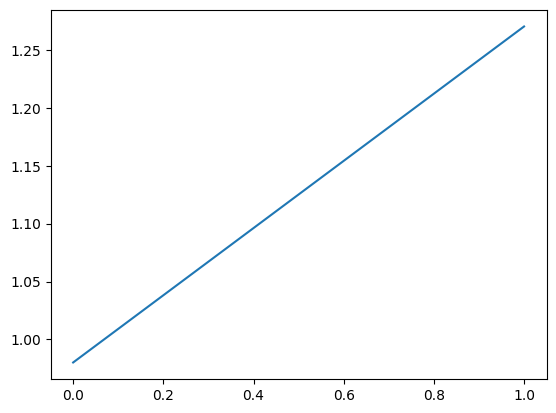

In [39]:
# draw the plot
plt.plot(value)